In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### Data Cleaning

In [2]:
# Importing Data
df = pd.read_csv('https://raw.githubusercontent.com/aashgohil/HR_Data_Science/main/aug_train.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
# Bucketing the company_size values into categorizes
df['size'] = np.where(df['company_size'].isin(['50-99','10-49','<10']), 'Small Company', 'Unknown')
df['size'] = np.where(df['company_size'].isin(['100-500','500-999']), 'Medium Company',df['size'])
df['size'] = np.where(df['company_size'].isin(['10000+','1000-4999','5000-9999']), 'Large Company',df['size'])
sorted_counts=df['size'].value_counts()

In [5]:
df.drop(['company_size'], axis=1, inplace=True)
df.rename(columns={'size': 'company_size'}, inplace=True)

In [6]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_type              6140
last_new_job               423
training_hours               0
target                       0
company_size                 0
dtype: int64

Thera are quite a few features with null values, we will investigate if null values have a significant impact on attrition, by encoding null with unknown, for features where the ratio of attrition for null values is similar to that of non null values, we will drop the null values, but for features where null values seems to have a significant impact on attrition we will keep those null values as Unknown.

In [7]:
df_temp = df.fillna('Unknown')

In [8]:
def plotsa1(category):  ## This function takes in a list of features and plots a count plot against the target variable

  for cat in category:
    plt.figure(figsize=(12,4))
    ax = sns.countplot(x=cat, hue='target', data=df_temp)
    plt.title(cat + ' vs Target')

    plt.show()

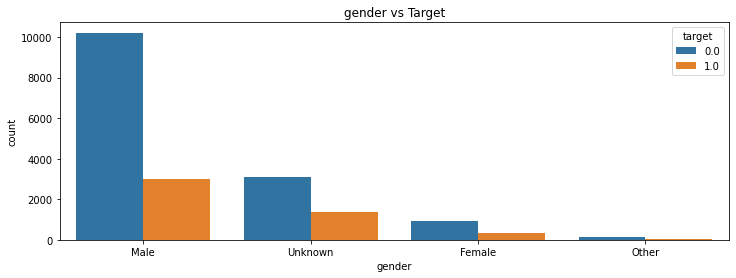

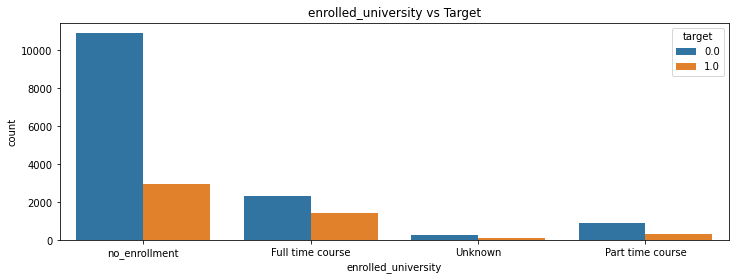

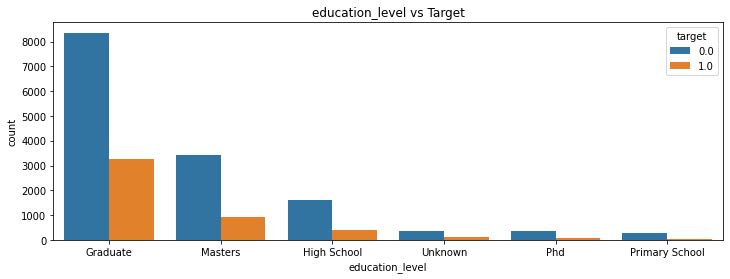

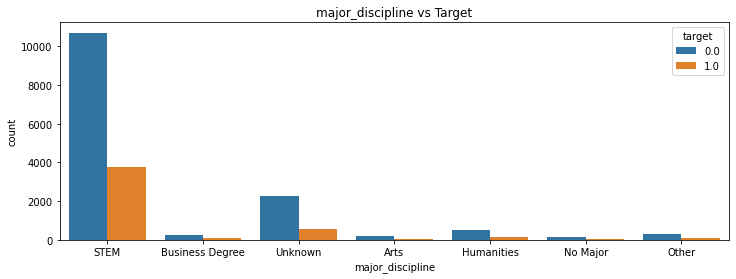

In [9]:
plotsa1(['gender','enrolled_university','education_level','major_discipline'])

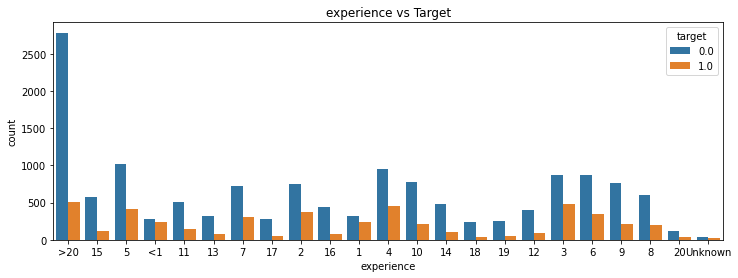

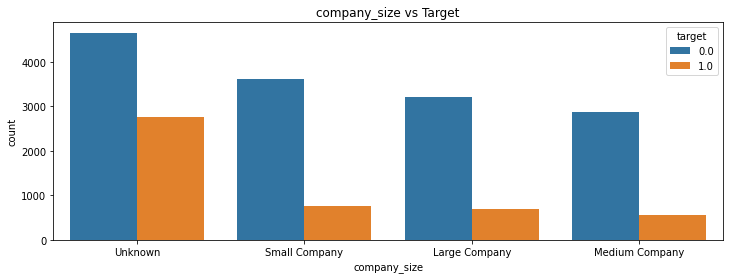

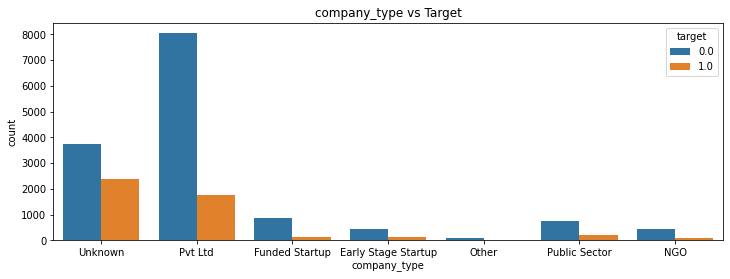

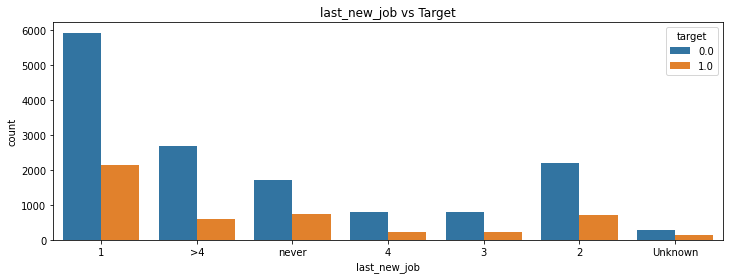

In [10]:
plotsa1(['experience','company_size','company_type','last_new_job'])

From the graphs above we can conclude, only for the variables company_size and company_type does the unknown value play an impact.

In [11]:
df_Clean = df.dropna(subset = ['gender','enrolled_university','education_level','major_discipline','experience','last_new_job'])
df_Clean = df_Clean.fillna('Unknown')
df_Clean['company_size'].replace({'10/49':'10-49'}, inplace=True)

In [12]:
df_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12477 entries, 0 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             12477 non-null  int64  
 1   city                    12477 non-null  object 
 2   city_development_index  12477 non-null  float64
 3   gender                  12477 non-null  object 
 4   relevent_experience     12477 non-null  object 
 5   enrolled_university     12477 non-null  object 
 6   education_level         12477 non-null  object 
 7   major_discipline        12477 non-null  object 
 8   experience              12477 non-null  object 
 9   company_type            12477 non-null  object 
 10  last_new_job            12477 non-null  object 
 11  training_hours          12477 non-null  int64  
 12  target                  12477 non-null  float64
 13  company_size            12477 non-null  object 
dtypes: float64(2), int64(2), object(10)
me

In [13]:
df_Clean.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_type              0
last_new_job              0
training_hours            0
target                    0
company_size              0
dtype: int64

## Aash EDA Questions

## Gender

1.1.1) Is the hiring of data scientists gender biased? What is the impact of gender on attrition?

In [14]:
def pie_plt(category, dataframe):    ## Function to create pie plot, takes input as list of features and dataframe

  for cat in category:
    values_m = dataframe[cat].value_counts()
    labels_m = values_m.index
    plt.subplots(figsize = (12,8))

    plt.pie(values_m, labels=labels_m,  wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }
        ,explode=(0.1, 0.1, 0.1), autopct='%0.2f%%')
    plt.title('Hiring of Data Scientist by Gender at Company')
    plt.show()

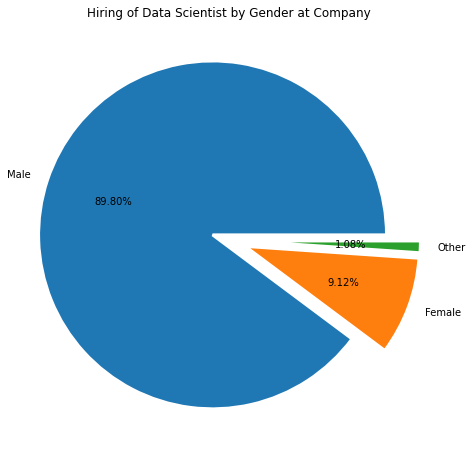

In [15]:
## PLotting a pie chart for hiring of DS by gender
pie_plt(['gender'], df_Clean)

Approximately 90% of the hires are male, demonstating a bias in the hiring of DS at this company, the industry average of male DS in USA is 65% according to the below source.

https://www.zippia.com/data-scientist-jobs/demographics/

In [17]:
def norm_cnt_plt(category, dataframe):  ## This function takes in a list of features and plots a normalized count plot against the target variable

  for cat in category:

    x,y = cat, 'target'
    df1 = dataframe.groupby(x)[y].value_counts(normalize=True) # Grouping by feature, and target variable, then normalizing it
    df1 = df1.mul(100) 
    df1 = df1.rename('percent').reset_index()

    ax =  sns.catplot(x=x,y='percent',hue=y, kind='bar',data=df1)  # Plotting the graph
    plt.xticks(rotation= 45)
    plt.title(cat + ' vs Target')
    plt.show()

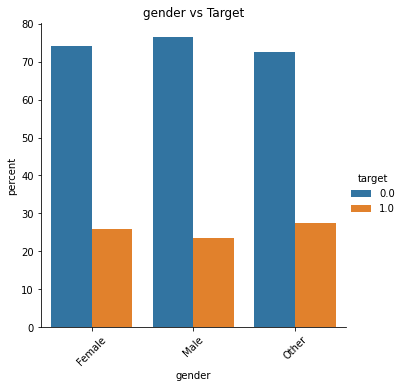

In [18]:
## Checking the impact of attrition on gender using a normalized bar plot.
norm_cnt_plt(['gender'], df_Clean)


From the above graph gender seems to have no impact on attrition.

## City

HDI is ranked on a scale from 0 to 1.0, with 1.0 being the highest human development. HDI is broken down into four tiers: very high human development (0.8-1.0), high human development (0.7-0.79), medium human development (0.55-.70), and low human development (below 0.55).

In [19]:
## Creating categorical values from CDI
cdi_bins = [0, 0.55, 0.70, 0.79, 1.0]
cdi_labels = ["low_human_development","medium_human_development","high_human_development","very_high_human_development"]
df_Clean['cdi_bucket'] = pd.cut(df_Clean['city_development_index'], bins = cdi_bins, labels = cdi_labels)

1.2.1) Which are the top 10 cities the company hires from? and their corresponding CDI. (the higher the CDI, the more urban the city is)

In [20]:
df_Clean.groupby(['city','city_development_index','cdi_bucket'], as_index= False)['enrollee_id'].count()   \
                  .sort_values(by = 'enrollee_id',ascending = False).head(10).reset_index(drop = True).rename(columns={"enrollee_id": "count"})

,city,city_development_index,cdi_bucket,count
0,city_103,0.920,very_high_human_development,3262.0
1,city_21,0.624,medium_human_development,1480.0
2,city_16,0.910,very_high_human_development,1093.0
3,city_114,0.926,very_high_human_development,801.0
4,city_160,0.920,very_high_human_development,619.0
5,city_136,0.897,very_high_human_development,405.0
6,city_67,0.855,very_high_human_development,277.0
7,city_75,0.939,very_high_human_development,218.0
8,city_104,0.924,very_high_human_development,190.0
9,city_102,0.804,very_high_human_development,190.0


Company hires mainly from very high human development cities, with majority of the candidates coming from city_103. The only exception is city_21 which is the 2nd highest in terms of hiring but has medium CDI, it can be possible this is a University Town.

1.2.2) How is CDI correlated with an individual’s education level?

In [21]:
## Since CDI is a numeric variable and Education level is categorical using anova to calculate corelation

df_cdi_edu = df_Clean[['education_level','city_development_index']]

In [22]:
# f_oneway() function takes the df_cdi_edu as input and returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between City Development Index and Education Level
# Assumption(H0) is that City Development Index and Education level are NOT correlated
 
# Finds out the CDI data for each education level as a list
CategoryGroupLists = df_cdi_edu.groupby('education_level')['city_development_index'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  2.8604593860651103e-18


Since the P-value is less than 0.05, we can reject the null H0, and conclude there is a correlation between CDI and education level

Citation : https://thinkingneuron.com/how-to-measure-the-correlation-between-a-numeric-and-a-categorical-variable-in-python/

In [23]:
################################   IMPORTANT INTERNAL ################################

print(df['education_level'].unique())
print(df_Clean['education_level'].unique())

['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
['Graduate' 'Masters' 'Phd']


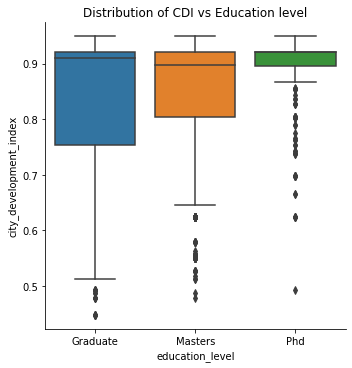

In [24]:
## Plottting a Boxplot to check the distribution 

sns.catplot(x="education_level", y="city_development_index", kind="box", data=df_cdi_edu).set(title='Distribution of CDI vs Education level');

1.2.3) Relationship between CDI and city code

In [25]:
df_Clean.groupby('cdi_bucket', as_index=False)['city'].nunique().rename(columns={'city':'Number of cities'})   \
                .sort_values(by = 'Number of cities', ascending = False).reset_index(drop=True)

,cdi_bucket,Number of cities
0,very_high_human_development,47
1,medium_human_development,36
2,high_human_development,28
3,low_human_development,9


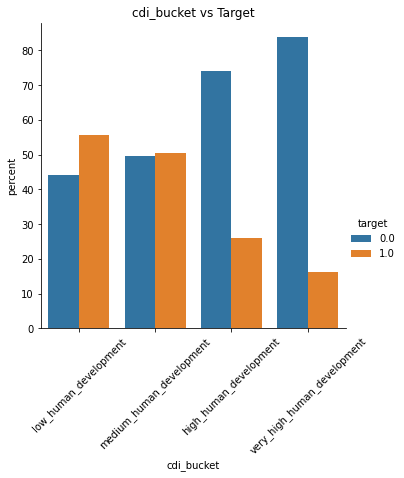

In [26]:
### Impact of CDI on attrition  using a normalized bar plot.
norm_cnt_plt(['cdi_bucket'], df_Clean)
